In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("income.csv")

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


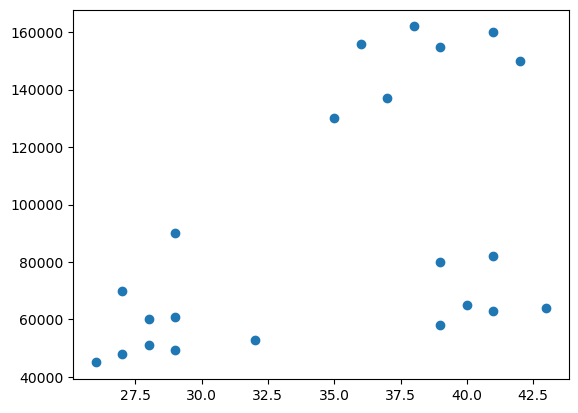

In [4]:
plt.scatter(df.Age,df["Income($)"])

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=3)

In [11]:
ypred = km.fit_predict(df[["Age","Income($)"]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
df["target"]= ypred

In [13]:
df

,Name,Age,Income($),target
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [14]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

Text(0, 0.5, 'income')

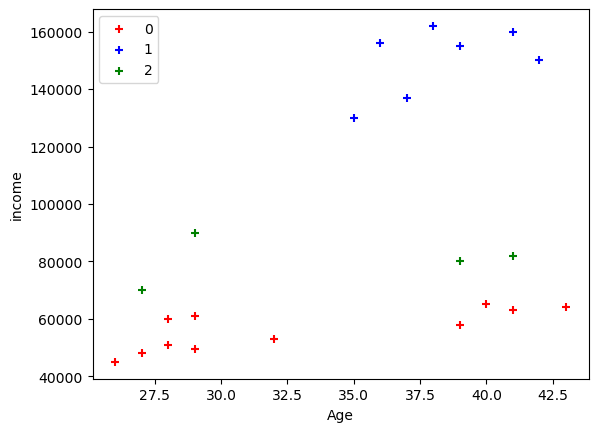

In [17]:
plt.scatter(df0["Age"],df0["Income($)"],marker="+",color="red"  ,label="0")
plt.scatter(df1["Age"],df1["Income($)"],marker="+",color="blue" ,label="1")
plt.scatter(df2["Age"],df2["Income($)"],marker="+",color="green",label="2")
plt.legend()
plt.xlabel("Age")
plt.ylabel("income")

this is not working properly reason is scaling age is narrow and income is large range of number

how can we make this work proper is by scaling the values betweent the range of 0 to 1 also known as normalisation

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [28]:
from sklearn.cluster import  KMeans
km = KMeans(n_clusters=3)
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])


In [30]:
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

In [31]:
df

,Name,Age,Income($),target
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [33]:
df["target"] = km.fit_predict(df[["Age","Income($)"]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
df

,Name,Age,Income($),target
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [35]:

df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

Text(0, 0.5, 'income')

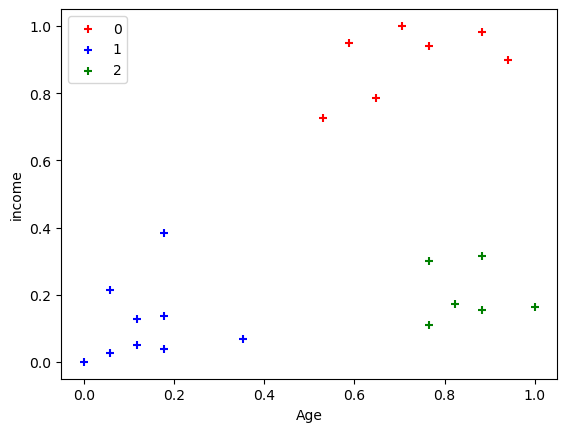

In [36]:
plt.scatter(df0["Age"],df0["Income($)"],marker="+",color="red"  ,label="0")
plt.scatter(df1["Age"],df1["Income($)"],marker="+",color="blue" ,label="1")
plt.scatter(df2["Age"],df2["Income($)"],marker="+",color="green",label="2")
plt.legend()
plt.xlabel("Age")
plt.ylabel("income")

we wil see below about elbow plot a way to find k value

In [37]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

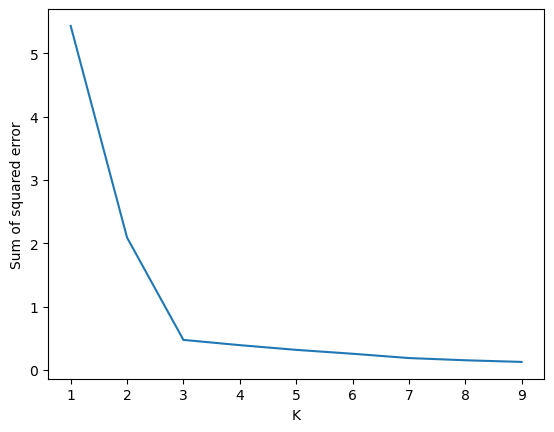

In [38]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)